## Customer Conversion Markov Chain Analysis

In [7]:
import numpy as np
import pandas as pd

# Step 1: Define the transition matrix P
states = ['S', 'L', '0', '1', '2']
P = [
    [1,   0,   0,    0,    0],       # S
    [0,   1,   0,    0,    0],       # L
    [0.1, 0.3, 0,  0.45, 0.15],      # 0 (New customer)
    [0.15,0.1, 0.1,0.25, 0.5],       # 1 (Low interest)
    [0.2, 0.05,0,  0.35, 0.4]        # 2 (High interest)
]
P_df = pd.DataFrame(P_data, index=states, columns=states)

# Step 2: Extract Q and R matrices
Q_df = P_df.loc[['0', '1', '2'], ['0', '1', '2']]  # Transient to transient
R_df = P_df.loc[['0', '1', '2'], ['S', 'L']]       # Transient to absorbing

# Step 3: Compute Fundamental Matrix N = (I - Q)^(-1)
Q = Q_df.values
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)
N_df = pd.DataFrame(N, index=Q_df.index, columns=Q_df.columns)

# Step 4: Compute expected number of steps before absorption
expected_steps = N.sum(axis=1)
expected_steps_df = pd.DataFrame(expected_steps, index=Q_df.index, columns=["Expected Steps"])

# Step 5: Compute absorption probabilities B = N * R
R = R_df.values
B = N @ R
B_df = pd.DataFrame(B, index=Q_df.index, columns=["P(Sale)", "P(Lost)"])

# Step 6: Combine results for display
results_df = pd.concat([expected_steps_df, B_df], axis=1)

# Optional: Display results
print("Transition Matrix P:\n", P_df, "\n")
print("Q Matrix:\n", Q_df, "\n")
print("R Matrix:\n", R_df, "\n")
print("Fundamental Matrix N:\n", N_df, "\n")
print("Expected Steps and Absorption Probabilities:\n", results_df)

Transition Matrix P:
       S     L    0     1     2
S  1.00  0.00  0.0  0.00  0.00
L  0.00  1.00  0.0  0.00  0.00
0  0.10  0.30  0.0  0.45  0.15
1  0.15  0.10  0.1  0.25  0.50
2  0.20  0.05  0.0  0.35  0.40 

Q Matrix:
      0     1     2
0  0.0  0.45  0.15
1  0.1  0.25  0.50
2  0.0  0.35  0.40 

R Matrix:
       S     L
0  0.10  0.30
1  0.15  0.10
2  0.20  0.05 

Fundamental Matrix N:
           0         1         2
0  1.132853  1.328527  1.390319
1  0.247168  2.471679  2.121524
2  0.144181  1.441813  2.904222 

Expected Steps and Absorption Probabilities:
    Expected Steps   P(Sale)   P(Lost)
0        3.851699  0.590628  0.542225
1        4.840371  0.819773  0.427394
2        4.490216  0.811535  0.332647


## Graph Visualization

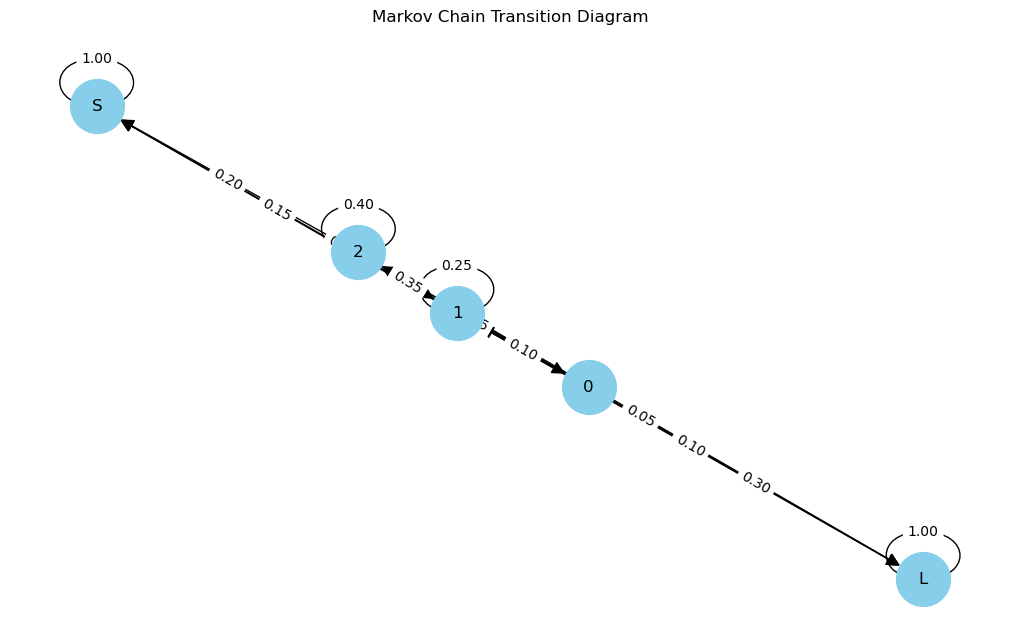

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges with labels for non-zero probabilities
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        prob = P[i][j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

# Position the nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, arrowsize=20)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.title("Markov Chain Transition Diagram")
plt.show()